<a href="https://colab.research.google.com/github/JaimeRoss/Data-Science/blob/main/project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
# Loading data for dataset 1
URL = "/content/drive/MyDrive/Student folder for data science bootcamp/CodingDojo/02-MachineLearning/Week07/Data/healthcare-dataset-stroke-data.csv"
df = pd.read_csv(URL)

In [53]:
# Inspecting info and displaying first 5 rows of dataset.
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


1. Source of data
-https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

2. Brief description of data
-According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient

3. What is the target?
-Stroke
4. What does one row represent? (A person? A business? An event? A product?)
- A person
5. Is this a classification or regression problem?
- Classification
6. How many features does the data have?
- 12
7. How many rows are in the dataset?
- 5110
8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?
- missing values, duplicates,innapropriate columns.

In [54]:
# dropping unnecessary/unwanted columns
df = df.drop(columns = "id")
# Checking if unwanted column has been dropped
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [55]:
# checking and addressing duplicates
dupli = df.duplicated().sum()
# Printing result
print(f"There are {dupli} duplicates in this dataset.")

There are 0 duplicates in this dataset.


There are no duplicates in this dataset

In [56]:
# Checking and addressing missing values
missval = df.isna().sum().sum()
# Printing result
print(f"There are {missval} missing values in this dataset.")

There are 201 missing values in this dataset.


In [57]:
# Checking which columns or categories have missing values
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

The bmi column has missing values.

In [58]:
# Addressing missing values
df["bmi"] = df["bmi"].fillna(-1)
df["bmi"].value_counts()

-1.0     201
 28.7     41
 28.4     38
 27.6     37
 26.7     37
        ... 
 11.5      1
 40.6      1
 53.9      1
 97.6      1
 14.9      1
Name: bmi, Length: 419, dtype: int64

Missing values have been replaced with -1 as a placeholder.

In [59]:
# Checking and addressing inconsistencies
for col in df:
    print(f"Value counts for {col}")
    print(df[col].value_counts())
    print("\n")

Value counts for gender
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


Value counts for age
78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: age, Length: 104, dtype: int64


Value counts for hypertension
0    4612
1     498
Name: hypertension, dtype: int64


Value counts for heart_disease
0    4834
1     276
Name: heart_disease, dtype: int64


Value counts for ever_married
Yes    3353
No     1757
Name: ever_married, dtype: int64


Value counts for work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


Value counts for Residence_type
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


Value counts for avg_glucose_level
93.88     6
91.68     5
91.85     5
83.16     5
73.00     5
         ..
111.93    1
94.40     1
95.57     1
66.29     1
85.28     1
Name:

There are no inconsistencies in the dataset.

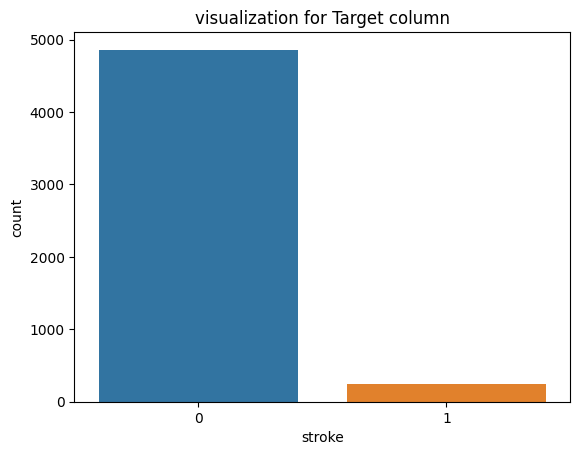

In [60]:
# Target Visualization
ax = sns.countplot(data = df, x = "stroke")
ax.set_title("visualization for Target column");

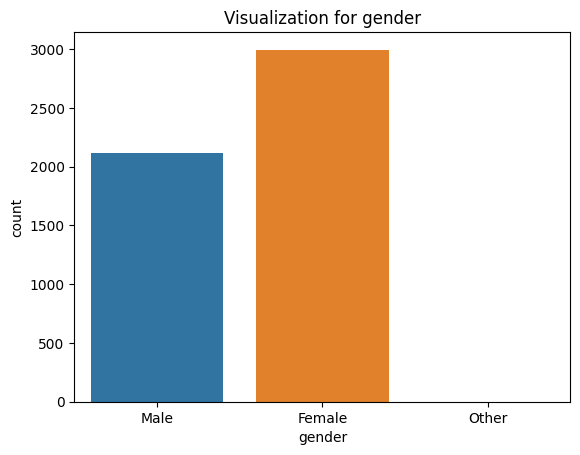

In [61]:
# Feature Visualization
ax = sns.countplot(data = df, x = "gender")
ax.set_title("Visualization for gender");

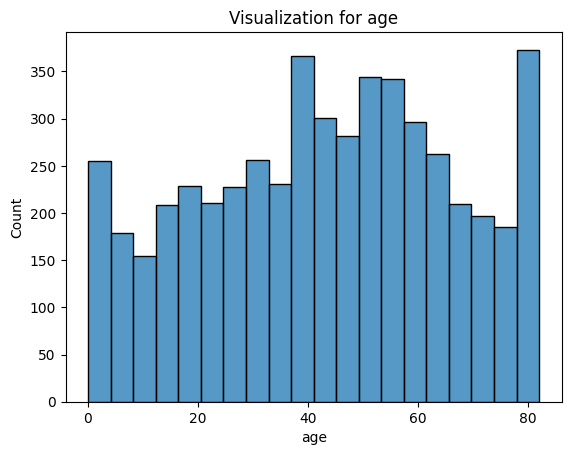

In [62]:
# Feature Visualization
ax = sns.histplot(data = df, x = "age")
ax.set_title("Visualization for age");

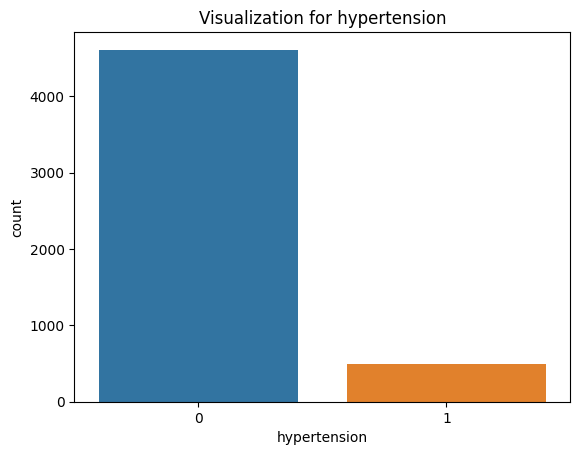

In [63]:
# Feature Visualization
ax = sns.countplot(data = df, x = "hypertension")
ax.set_title("Visualization for hypertension");

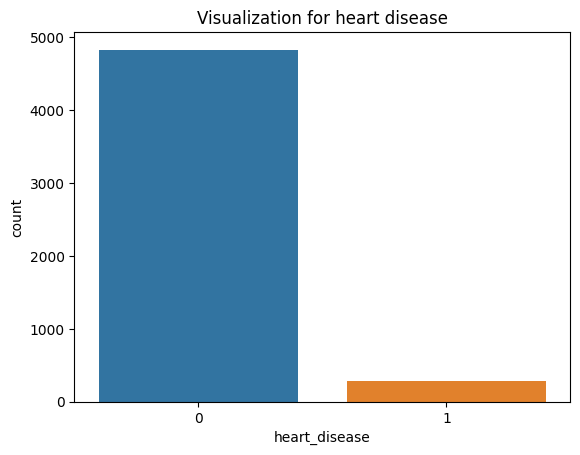

In [64]:
# Feature Visualization
ax = sns.countplot(data = df, x = "heart_disease")
ax.set_title("Visualization for heart disease");

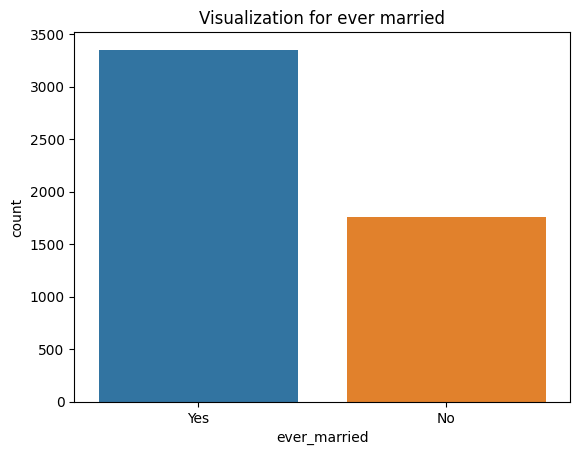

In [65]:
# Feature Visualization
ax = sns.countplot(data = df, x = "ever_married")
ax.set_title("Visualization for ever married");

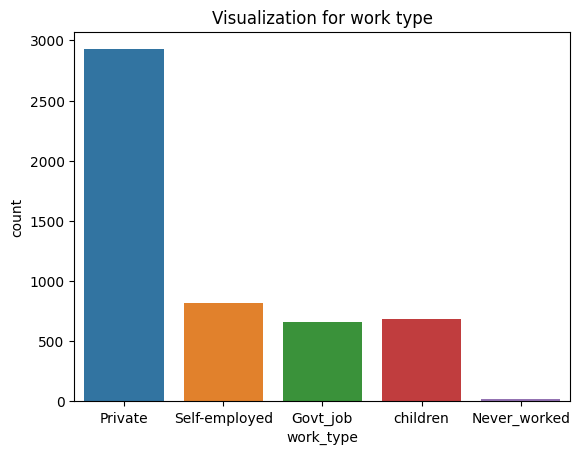

In [66]:
# Feature Visualization
ax = sns.countplot(data = df, x = "work_type")
ax.set_title("Visualization for work type");

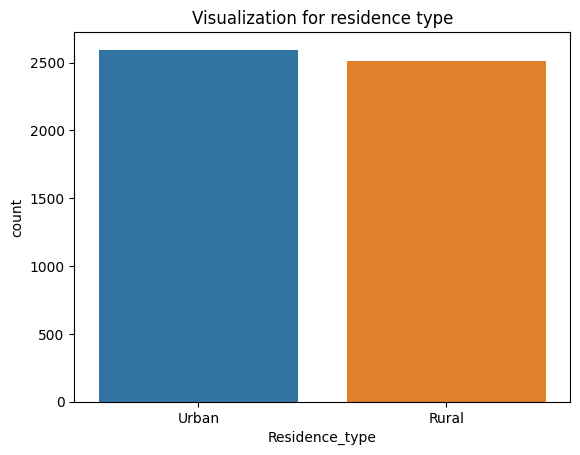

In [67]:
# Feature Visualization
ax = sns.countplot(data = df, x = "Residence_type")
ax.set_title("Visualization for residence type");

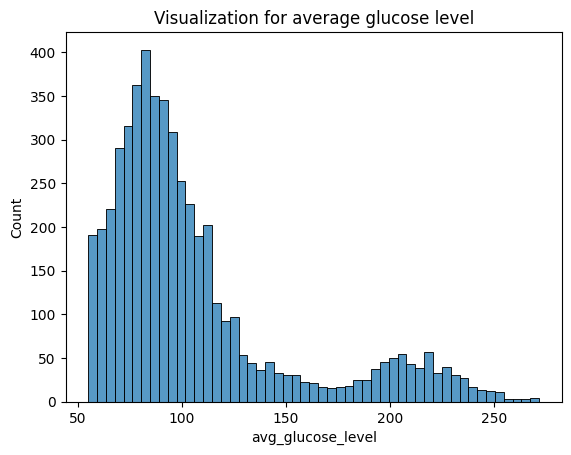

In [68]:
# Feature Visualization
ax = sns.histplot(data = df, x = "avg_glucose_level")
ax.set_title("Visualization for average glucose level");

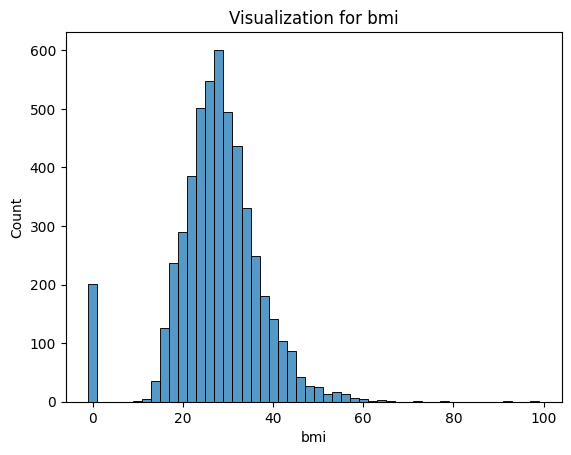

In [78]:
# Feature Visualization
ax = sns.histplot(data = df, x = "bmi", bins = "auto", binwidth = 2)
ax.set_title("Visualization for bmi");

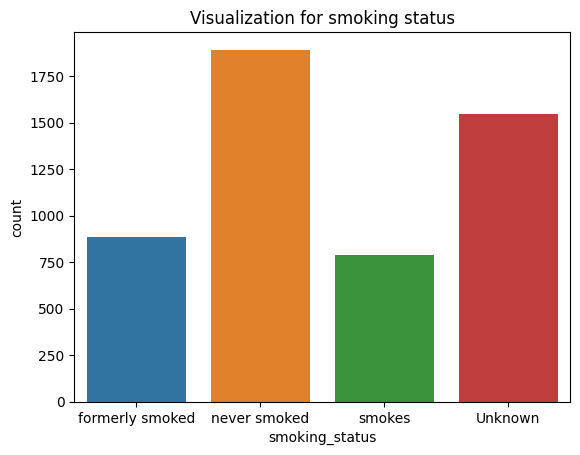

In [79]:
# Feature Visualization
ax = sns.countplot(data = df, x = "smoking_status")
ax.set_title("Visualization for smoking status");

In [71]:
# Checking for outliers.
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,27.717397,0.048728
std,22.612647,0.296607,0.226063,45.283560,9.645369,0.215320
min,0.080000,0.000000,0.000000,55.120000,-1.000000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,22.900000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,27.700000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


There may be outliers in the bmi column, as there is a mean of 27.72 and a max value of 97.6.